Nama : Muhammad Alam Basalamah
NIM : 2101677

In [35]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from datetime import datetime,date
from time import strptime
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
pd.set_option('display.max_columns', 500)

In [43]:
data_pmi = pd.read_csv('D:/uas/dataset/pmi.csv', delimiter=";")
data_perempuan = pd.read_csv('D:/uas/dataset/persen_perempuan_kerja_manajerial.csv', delimiter=";")
data_proporsi = pd.read_csv('D:/uas/dataset/proporsi_hidup_dibawah_50_persen_median_pendapatan.csv', delimiter=";")
data_layanan = pd.read_csv('D:/uas/dataset/proporsi_rt_akses_layanan_dasar.csv', delimiter=";")

In [44]:
print(list(data_pmi))
print(list(data_perempuan))
print(list(data_proporsi))
print(list(data_layanan))

print(data_pmi.describe())
print(data_perempuan.describe())
print(data_proporsi.describe())
print(data_layanan.describe())

['prov,tahun,kategori_pmi']
['tahun,pct_perempuan_managerial,prov']
['prov,tahun,kepadatan_penduduk']
['tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov']
['tahun,proporsi_rt_akses_layanan_dasar,prov']
       prov,tahun,kategori_pmi
count                      442
unique                     442
top           ACEH,2022,TINGGI
freq                         1
       tahun,pct_perempuan_managerial,prov
count                                  245
unique                                 245
top                         2021,30.6,ACEH
freq                                     1
       prov,tahun,kepadatan_penduduk
count                            280
unique                           280
top                     ACEH,2021,92
freq                               1
       tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov
count                                                 140           
unique                                                140           
top                    

Praproses

In [41]:
data_pmi.unique()

prov,tahun,kategori_pmi    442
dtype: int64

In [56]:
data_pmi["prov,tahun,kategori_pmi"].str.split(",")

0                       [ACEH, 2022, TINGGI]
1             [SUMATERA UTARA, 2022, TINGGI]
2             [SUMATERA BARAT, 2022, TINGGI]
3                       [RIAU, 2022, TINGGI]
4                      [JAMBI, 2022, TINGGI]
                       ...                  
437    [SULAWESI BARAT, 2010, SANGAT RENDAH]
438                   [MALUKU, 2010, SEDANG]
439             [MALUKU UTARA, 2010, SEDANG]
440       [PAPUA BARAT, 2010, SANGAT RENDAH]
441             [PAPUA, 2010, SANGAT RENDAH]
Name: prov,tahun,kategori_pmi, Length: 442, dtype: object

In [73]:
data_pmi.head()

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI
3,RIAU,2022,TINGGI
4,JAMBI,2022,TINGGI


In [78]:
data_perempuan[["tahun", "pct_perempuan_managerial", "prov"]] = data_perempuan["tahun,pct_perempuan_managerial,prov"].str.split(",", expand=True)
data_proporsi[["tahun","proporsi_hidup_dibawah_50_persen_median_pendapatan","prov"]] = data_proporsi["tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov"].str.split(",", expand=True)
data_layanan[["tahun","proporsi_rt_akses_layanan_dasar","prov"]] = data_layanan["tahun,proporsi_rt_akses_layanan_dasar,prov"].str.split(",",expand=True)

In [79]:
data_pmi.head()
data_perempuan.head()
data_proporsi.head()
data_layanan.head()


,"tahun,proporsi_rt_akses_layanan_dasar,prov",tahun,proporsi_rt_akses_layanan_dasar,prov
0,"2021,69.31,ACEH",2021,69.31,ACEH
1,"2021,68.22,SUMATERA UTARA",2021,68.22,SUMATERA UTARA
2,"2021,82.09,SUMATERA BARAT",2021,82.09,SUMATERA BARAT
3,"2021,74.93,RIAU",2021,74.93,RIAU
4,"2021,73.41,JAMBI",2021,73.41,JAMBI


In [83]:
data_perempuan.dtypes
data_proporsi.dtypes
data_layanan.dtypes

tahun,proporsi_rt_akses_layanan_dasar,prov    object
tahun                                         object
proporsi_rt_akses_layanan_dasar               object
prov                                          object
dtype: object

In [87]:
data_perempuan.drop("tahun,pct_perempuan_managerial,prov", axis=1, inplace=True)
data_proporsi.drop("proporsi_hidup_dibawah_50_persen_median_pendapatan", axis=1, inplace=True)
data_layanan.drop("tahun,proporsi_rt_akses_layanan_dasar,prov", axis=1, inplace=True)

In [69]:
data_pmi['prov'] = data_pmi['prov'].astype("category")
data_pmi['tahun'] = data_pmi['tahun'].astype("string")
data_pmi['kategori_pmi'] = data_pmi['kategori_pmi'].astype("string")

In [91]:
data_perempuan['prov'] = data_perempuan['prov'].astype("category")
data_proporsi['prov'] = data_proporsi['prov'].astype("category")
data_layanan['prov'] = data_layanan['prov'].astype("category")

In [ ]:
data_ori.rename(columns = {})

In [106]:
data_asli = data_pmi.merge(data_perempuan, on=['prov'])

data_asli.head()

,prov,tahun_x,kategori_pmi,tahun_y,pct_perempuan_managerial
0,ACEH,2022,TINGGI,2021,30.6
1,ACEH,2022,TINGGI,2020,32.61
2,ACEH,2022,TINGGI,2019,26.13
3,ACEH,2022,TINGGI,2018,20.56
4,ACEH,2022,TINGGI,2017,20.8


In [108]:
data_asli2 = data_proporsi.merge(data_layanan, on=["prov"])

In [109]:
data_hasil = data_asli.merge(data_asli2, on=["prov"])

In [110]:
print(data_hasil.isnull().sum())

prov                                                             0
tahun_x_x                                                        0
kategori_pmi                                                     0
tahun_y_x                                                        0
pct_perempuan_managerial                                         0
tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov    0
tahun_x_y                                                        0
proporsi_hidup_dibawah_50_persen_median_pendapatan               0
tahun_y_y                                                        0
proporsi_rt_akses_layanan_dasar                                  0
dtype: int64


EDA

[Text(0.5, 1.0, 'Jumlah akses layanan dasar')]

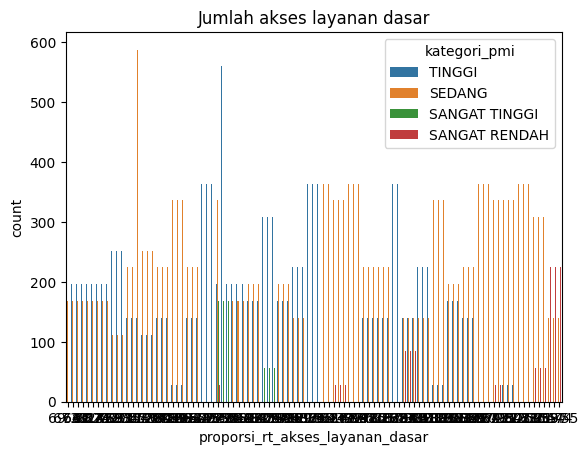

In [116]:
sns.countplot(x="proporsi_rt_akses_layanan_dasar", hue="kategori_pmi", data=data_hasil).set(title="Jumlah akses layanan dasar")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'ACEH'),
  Text(1, 0, 'SUMATERA UTARA'),
  Text(2, 0, 'SUMATERA BARAT'),
  Text(3, 0, 'RIAU'),
  Text(4, 0, 'JAMBI'),
  Text(5, 0, 'SUMATERA SELATAN'),
  Text(6, 0, 'BENGKULU'),
  Text(7, 0, 'LAMPUNG'),
  Text(8, 0, 'KEP. BANGKA BELITUNG'),
  Text(9, 0, 'KEP. RIAU'),
  Text(10, 0, 'DKI JAKARTA'),
  Text(11, 0, 'JAWA BARAT'),
  Text(12, 0, 'JAWA TENGAH'),
  Text(13, 0, 'DI YOGYAKARTA'),
  Text(14, 0, 'JAWA TIMUR'),
  Text(15, 0, 'BANTEN'),
  Text(16, 0, 'BALI'),
  Text(17, 0, 'NUSA TENGGARA BARAT'),
  Text(18, 0, 'NUSA TENGGARA TIMUR'),
  Text(19, 0, 'KALIMANTAN BARAT'),
  Text(20, 0, 'KALIMANTAN TENGAH'),
  Text(21, 0, 'KALIMANTAN SELATAN'),
  Text(22, 0, 'KALIMANTAN TIMUR'),
  Text(23, 0, 'KALIMANTAN UTARA'),
  Text(24, 0, 'SULAWESI UTARA'),
  Text(25, 0, 'SULAWESI TENGAH'),
  Text(26, 0, 'SULAWESI SELATAN'),
  Text(27, 

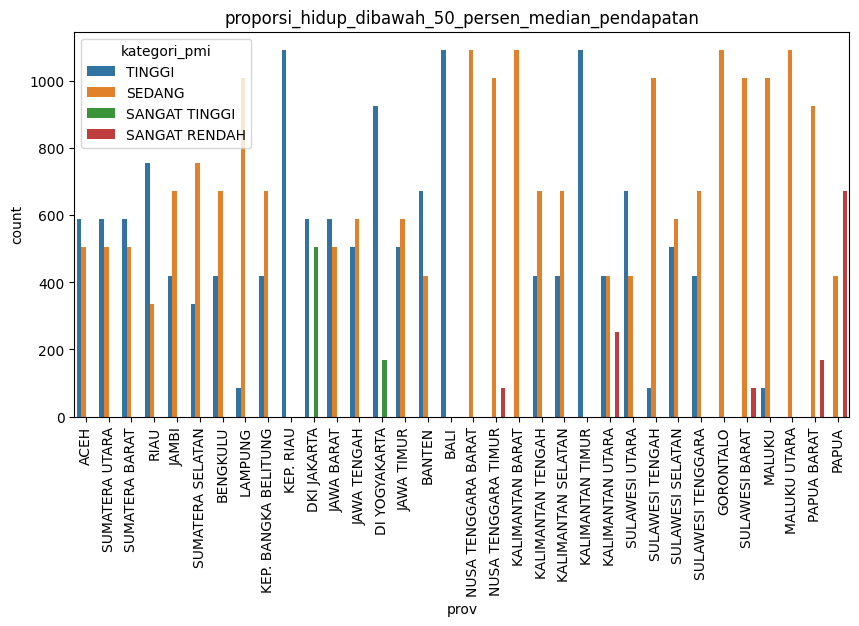

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(ax=ax, x="prov" , hue="kategori_pmi", data=data_hasil).set(title="proporsi_hidup_dibawah_50_persen_median_pendapatan")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'TINGGI'),
  Text(1, 0, 'SEDANG'),
  Text(2, 0, 'SANGAT TINGGI'),
  Text(3, 0, 'SANGAT RENDAH')])

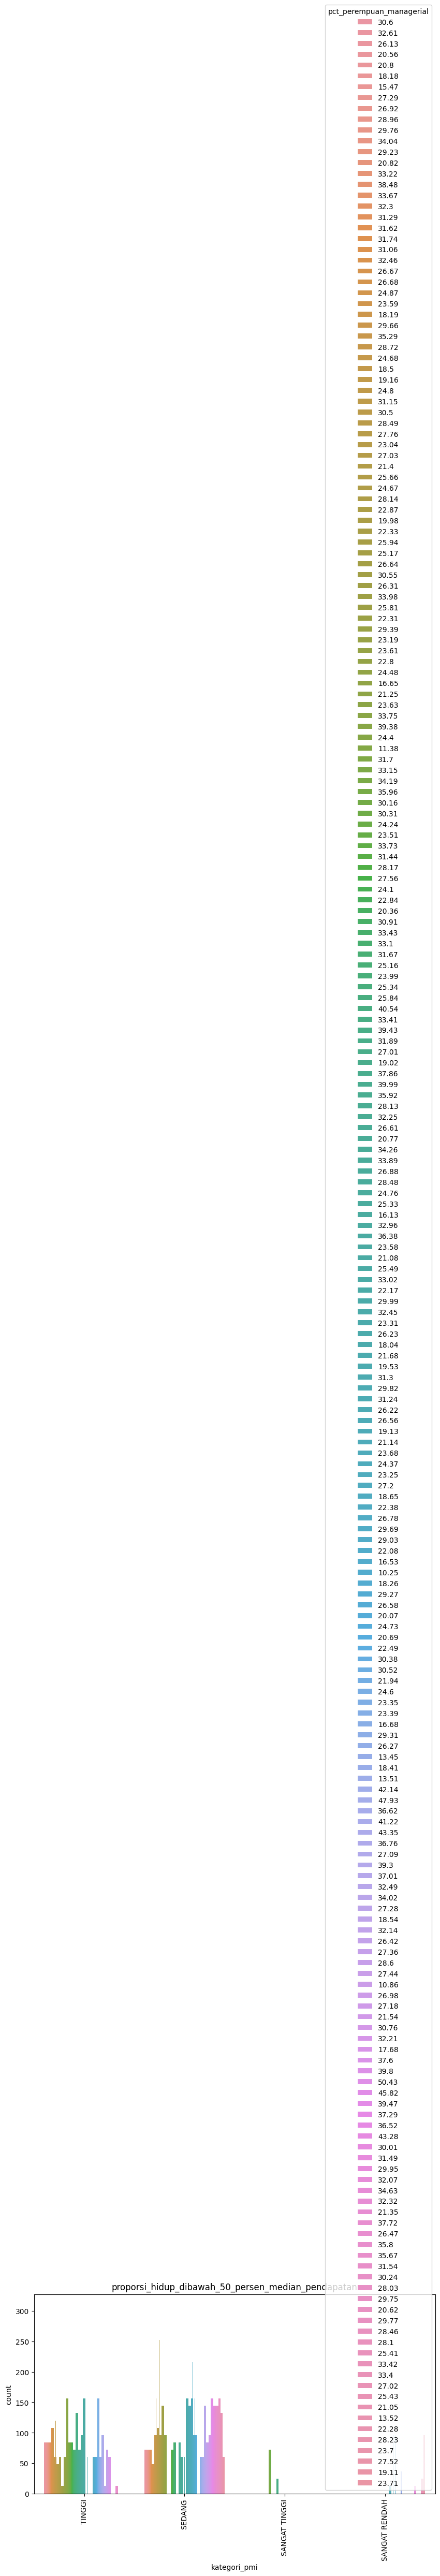

In [126]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(ax=ax, x="kategori_pmi" , hue="pct_perempuan_managerial", data=data_hasil).set(title="proporsi_hidup_dibawah_50_persen_median_pendapatan")
plt.xticks(rotation=90)

ONE HOT ENCODING //masih salah banget pak belum dirapihkan datanya

In [128]:
data_ori = pd.get_dummies(data=data_hasil, columns=['kategori_pmi','proporsi_rt_akses_layanan_dasar', 'proporsi_hidup_dibawah_50_persen_median_pendapatan', 'pct_perempuan_managerial'])
data_ori.head()

,prov,tahun_x_x,tahun_y_x,"tahun,proporsi_hidup_dibawah_50_persen_median_pendapatan,prov",tahun_x_y,tahun_y_y,kategori_pmi_SANGAT RENDAH,kategori_pmi_SANGAT TINGGI,kategori_pmi_SEDANG,kategori_pmi_TINGGI,proporsi_rt_akses_layanan_dasar_35.55,proporsi_rt_akses_layanan_dasar_36.44,proporsi_rt_akses_layanan_dasar_36.97,proporsi_rt_akses_layanan_dasar_51.92,proporsi_rt_akses_layanan_dasar_54.43,proporsi_rt_akses_layanan_dasar_56.33,proporsi_rt_akses_layanan_dasar_64.0,proporsi_rt_akses_layanan_dasar_67.3,proporsi_rt_akses_layanan_dasar_67.98,proporsi_rt_akses_layanan_dasar_68.22,proporsi_rt_akses_layanan_dasar_69.31,proporsi_rt_akses_layanan_dasar_69.47,proporsi_rt_akses_layanan_dasar_71.31,proporsi_rt_akses_layanan_dasar_71.43,proporsi_rt_akses_layanan_dasar_71.47,proporsi_rt_akses_layanan_dasar_72.11,proporsi_rt_akses_layanan_dasar_72.81,proporsi_rt_akses_layanan_dasar_72.9,proporsi_rt_akses_layanan_dasar_73.05,proporsi_rt_akses_layanan_dasar_73.12,proporsi_rt_akses_layanan_dasar_73.18,proporsi_rt_akses_layanan_dasar_73.41,proporsi_rt_akses_layanan_dasar_73.53,proporsi_rt_akses_layanan_dasar_73.71,proporsi_rt_akses_layanan_dasar_73.84,proporsi_rt_akses_layanan_dasar_74.19,proporsi_rt_akses_layanan_dasar_74.26,proporsi_rt_akses_layanan_dasar_74.49,proporsi_rt_akses_layanan_dasar_74.73,proporsi_rt_akses_layanan_dasar_74.93,proporsi_rt_akses_layanan_dasar_74.94,proporsi_rt_akses_layanan_dasar_75.04,proporsi_rt_akses_layanan_dasar_75.1,proporsi_rt_akses_layanan_dasar_75.28,proporsi_rt_akses_layanan_dasar_75.6,proporsi_rt_akses_layanan_dasar_75.84,proporsi_rt_akses_layanan_dasar_76.25,proporsi_rt_akses_layanan_dasar_76.82,proporsi_rt_akses_layanan_dasar_76.83,proporsi_rt_akses_layanan_dasar_77.08,proporsi_rt_akses_layanan_dasar_77.16,proporsi_rt_akses_layanan_dasar_77.81,proporsi_rt_akses_layanan_dasar_77.82,proporsi_rt_akses_layanan_dasar_78.03,proporsi_rt_akses_layanan_dasar_78.06,proporsi_rt_akses_layanan_dasar_78.36,proporsi_rt_akses_layanan_dasar_78.8,proporsi_rt_akses_layanan_dasar_78.83,proporsi_rt_akses_layanan_dasar_79.1,proporsi_rt_akses_layanan_dasar_79.12,proporsi_rt_akses_layanan_dasar_79.13,proporsi_rt_akses_layanan_dasar_79.36,proporsi_rt_akses_layanan_dasar_79.49,proporsi_rt_akses_layanan_dasar_79.52,proporsi_rt_akses_layanan_dasar_79.63,proporsi_rt_akses_layanan_dasar_79.71,proporsi_rt_akses_layanan_dasar_79.84,proporsi_rt_akses_layanan_dasar_80.27,proporsi_rt_akses_layanan_dasar_80.35,proporsi_rt_akses_layanan_dasar_80.52,proporsi_rt_akses_layanan_dasar_80.69,proporsi_rt_akses_layanan_dasar_80.77,proporsi_rt_akses_layanan_dasar_80.89,proporsi_rt_akses_layanan_dasar_81.21,proporsi_rt_akses_layanan_dasar_81.22,proporsi_rt_akses_layanan_dasar_81.38,proporsi_rt_akses_layanan_dasar_81.88,proporsi_rt_akses_layanan_dasar_81.93,proporsi_rt_akses_layanan_dasar_82.09,proporsi_rt_akses_layanan_dasar_82.23,proporsi_rt_akses_layanan_dasar_82.69,proporsi_rt_akses_layanan_dasar_82.97,proporsi_rt_akses_layanan_dasar_83.12,proporsi_rt_akses_layanan_dasar_83.4,proporsi_rt_akses_layanan_dasar_83.71,proporsi_rt_akses_layanan_dasar_83.77,proporsi_rt_akses_layanan_dasar_84.42,proporsi_rt_akses_layanan_dasar_84.58,proporsi_rt_akses_layanan_dasar_84.64,proporsi_rt_akses_layanan_dasar_85.34,proporsi_rt_akses_layanan_dasar_85.35,proporsi_rt_akses_layanan_dasar_85.39,proporsi_rt_akses_layanan_dasar_85.4,proporsi_rt_akses_layanan_dasar_85.69,proporsi_rt_akses_layanan_dasar_85.81,proporsi_rt_akses_layanan_dasar_85.97,proporsi_rt_akses_layanan_dasar_86.67,proporsi_rt_akses_layanan_dasar_86.7,proporsi_rt_akses_layanan_dasar_86.87,proporsi_rt_akses_layanan_dasar_87.02,proporsi_rt_akses_layanan_dasar_87.16,proporsi_rt_akses_layanan_dasar_87.54,proporsi_rt_akses_layanan_dasar_87.73,proporsi_rt_akses_layanan_dasar_88.33,proporsi_rt_akses_layanan_dasar_88.71,proporsi_rt_akses_layanan_dasar_89.08,proporsi_rt_akses_layanan_dasar_89.44,proporsi_rt_akses_layanan_dasar_89.68,proporsi_rt_akses_layanan_dasar_91.3,proporsi_hidup_dibawah_50_persen_median_penda

In [129]:
from sklearn.model_selection import train_test_split
X = data_ori.drop(['tahun_x_x','tahun_y_x'],axis=1)
Y = data_ori['prov']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=123)

import pickle
with open('x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

ValueError: could not convert string to float: 'SULAWESI TENGAH'